## Experimento finales
En este notebook se pretende tener los últimos resultados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import scripts.local_environment as local
import importlib

importlib.reload(local)

<module 'scripts.local_environment' from '/home/sergioml/degree_project/scripts/local_environment.py'>

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
import xgboost as xgb

In [5]:
df = pd.read_csv('data/clean/train_clean.csv')
df_targets = pd.read_csv('data/clean/train_labels.csv')
df_test = pd.read_csv('data/clean/test_clean.csv')

In [9]:
del df_purchsers

In [10]:
df_purchasers = pd.read_csv('data/clean/train_purchasers.csv')

### Experimento 14

In [361]:
targets_by_date = df.loc[:, ['fecha_dato', 'ncodpers']].join(df_targets)
targets_by_date.shape

(13387956, 26)

In [362]:
targets_by_date.head()

,fecha_dato,ncodpers,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-28,1050611,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-28,1050612,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-28,1050613,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-28,1050614,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [363]:
fecha_dato = targets_by_date['fecha_dato'].unique()

#### Solo sacando los clientes que compran cada mes

In [364]:
%%time
df_purchasers = pd.DataFrame(columns=df.columns.tolist())

for i in range(1, len(fecha_dato)):
    print(fecha_dato[i-1], fecha_dato[i])
    prev = targets_by_date.loc[targets_by_date['fecha_dato'] == fecha_dato[i-1], 'ncodpers':]
    act = targets_by_date.loc[targets_by_date['fecha_dato'] == fecha_dato[i], 'ncodpers':]

    ncodpers_both = list(set(prev.ncodpers.values) & set(act.ncodpers.values))

    prev = prev.loc[prev['ncodpers'].isin(ncodpers_both)].sort_values(['ncodpers']).loc[:, 'ind_ahor_fin_ult1':]
    act = act.loc[act['ncodpers'].isin(ncodpers_both)].sort_values(['ncodpers']).loc[:, 'ind_ahor_fin_ult1':]

    prev = prev.as_matrix()
    act = act.as_matrix()

    who_bought = np.sort(np.array(ncodpers_both)) * (act - prev).max(axis=1)
    who_bought = np.unique(who_bought)[1:]

    df_purchasers = df_purchasers.append(df.loc[(df['fecha_dato'] == fecha_dato[i]) & (df['ncodpers'].isin(who_bought))])

2015-01-28 2015-02-28
2015-02-28 2015-03-28
2015-03-28 2015-04-28
2015-04-28 2015-05-28
2015-05-28 2015-06-28
2015-06-28 2015-07-28
2015-07-28 2015-08-28
2015-08-28 2015-09-28
2015-09-28 2015-10-28
2015-10-28 2015-11-28
2015-11-28 2015-12-28
2015-12-28 2016-01-28
2016-01-28 2016-02-28
2016-02-28 2016-03-28
2016-03-28 2016-04-28
2016-04-28 2016-05-28
CPU times: user 1min 37s, sys: 15.3 s, total: 1min 52s
Wall time: 1min 52s


In [365]:
df_purchasers.shape

(420025, 28)

In [366]:
df_purchasers.tail()

,fecha_dato,fecha_dato_year,fecha_dato_month,fecha_dato_day,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,...,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
13387545,2016-05-28,2016.0,5.0,28.0,1167007.0,1.0,1.0,1.0,73.0,2013-08-16,...,2.0,1.0,2.0,1.0,1.0,46.0,3.0,1.0,104186.06,3.0
13387561,2016-05-28,2016.0,5.0,28.0,1166874.0,1.0,1.0,1.0,22.0,2013-08-16,...,2.0,1.0,1.0,1.0,1.0,25.0,36.0,1.0,80245.26,2.0
13387682,2016-05-28,2016.0,5.0,28.0,1167055.0,1.0,1.0,1.0,39.0,2014-11-12,...,2.0,1.0,3.0,1.0,1.0,33.0,12.0,1.0,128593.05,1.0
13387694,2016-05-28,2016.0,5.0,28.0,1167038.0,1.0,1.0,1.0,35.0,2013-08-16,...,2.0,1.0,3.0,1.0,1.0,46.0,3.0,1.0,104985.78,1.0
13387905,2016-05-28,2016.0,5.0,28.0,1166753.0,1.0,1.0,1.0,22.0,2013-08-14,...,2.0,1.0,1.0,1.0,1.0,9.0,29.0,1.0,86137.50,2.0


In [367]:
df_purchasers.to_csv('data/clean/train_purcharsers.csv', index=True, index_label='index')

#### Entrenamiento con todos los compradores

In [80]:
x_train = df_purchasers.drop(['fecha_dato', 'ncodpers', 'fecha_alta'], axis=1)
y_train = df_targets.loc[x_train.index]

In [81]:
%%time
x = x_train.as_matrix()
y = y_train.as_matrix()
model = local.model(x, y, RandomForestClassifier(n_jobs=-1))

CPU times: user 1min 45s, sys: 7.3 s, total: 1min 53s
Wall time: 29.5 s


In [83]:
%%time
x_test = df_test.drop(['fecha_dato', 'fecha_alta', 'ncodpers'], axis=1).as_matrix()
probs, preds = local.calculatePredsProbs(x_test, model)

x_prev = df_purchasers.loc[df_purchasers['fecha_dato'] == '2016-05-28']
subm = local.processPredictions(probs=probs, preds=preds, df_prev=x_prev, df_test=df_test, df_targets=y_train, env='submit')

results/submissions/2018-07-18-h21-24-23_submission.csv
CPU times: user 3min 35s, sys: 8.36 s, total: 3min 43s
Wall time: 1min 44s


In [84]:
!bash results/submissions/kaggle_submission "RF, entrenamiento con todo el dataset, sólo compradores"

2018-07-18-h21-24-23_submission.csv
/home/sergioml/.local/lib/python2.7/site-packages/urllib3/contrib/socks.py:37: DependencyWarning: SOCKS support in urllib3 requires the installation of optional dependencies: specifically, PySocks.  For more information, see https://urllib3.readthedocs.io/en/latest/contrib.html#socks-proxies
  DependencyWarning
Successfully submitted to Santander Product Recommendation
real	2m0.858s
user	0m1.284s
sys	0m0.388s


#### Validando las compras hechas con el mes de Mayo 2016

In [85]:
%%time
x_test = df_test.drop(['fecha_dato', 'fecha_alta', 'ncodpers'], axis=1).as_matrix()
probs, preds = local.calculatePredsProbs(x_test, model)

x_prev = df.loc[df['fecha_dato'] == '2016-05-28']
subm = local.processPredictions(probs=probs, preds=preds, df_prev=x_prev, df_test=df_test, df_targets=y_train, env='submit')

results/submissions/2018-07-18-h21-28-56_submission.csv
CPU times: user 3min 19s, sys: 8.46 s, total: 3min 27s
Wall time: 1min 39s


In [86]:
!bash results/submissions/kaggle_submission "RF, entrenamiento con todo el dataset, sólo compradores, todo el mes de Mayo2016 para validar"

2018-07-18-h21-28-56_submission.csv
/home/sergioml/.local/lib/python2.7/site-packages/urllib3/contrib/socks.py:37: DependencyWarning: SOCKS support in urllib3 requires the installation of optional dependencies: specifically, PySocks.  For more information, see https://urllib3.readthedocs.io/en/latest/contrib.html#socks-proxies
  DependencyWarning
Successfully submitted to Santander Product Recommendation
real	0m23.330s
user	0m1.168s
sys	0m0.340s


### Experimento 15
Prueba con **xgboost** solo datos de Mayo 2016

In [135]:
x_train = df_purchasers.loc[df_purchasers['fecha_dato'] == '2016-05-28']
y_train = df_targets.loc[x_train.index]

In [94]:
%%time
dtrain = xgb.DMatrix(x_train.as_matrix(), y_train.as_matrix())

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 9.89 ms


In [104]:
params = {'max_depth': 2, 
          'eta': 1, 'silent': 1, 
          'objective': 'multi:softprob',
          'num_class': 24}

In [105]:
%%time
model = xgb.train(params, dtrain)

CPU times: user 4.13 s, sys: 12 ms, total: 4.14 s
Wall time: 1.06 s


In [118]:
%%time
x_test = df_test.drop(['ncodpers', 'fecha_dato', 'fecha_alta'], axis=1)
dtest = xgb.DMatrix(x_test.as_matrix())
preds = model.predict(dtest)

CPU times: user 14.2 s, sys: 416 ms, total: 14.7 s
Wall time: 4.29 s


In [138]:
%%time
subm = local.processPredictions(preds=preds, df_prev=x_train, df_test=df_test, df_targets=y_train)

results/submissions/2018-07-18-h22-10-15_submission.csv
CPU times: user 15.6 s, sys: 356 ms, total: 16 s
Wall time: 17.1 s


In [139]:
!bash results/submissions/kaggle_submission "Xgboost, entrenamiento con Mayo2016 de compradores"

2018-07-18-h22-10-15_submission.csv
/home/sergioml/.local/lib/python2.7/site-packages/urllib3/contrib/socks.py:37: DependencyWarning: SOCKS support in urllib3 requires the installation of optional dependencies: specifically, PySocks.  For more information, see https://urllib3.readthedocs.io/en/latest/contrib.html#socks-proxies
  DependencyWarning
Successfully submitted to Santander Product Recommendation
real	2m9.913s
user	0m1.480s
sys	0m0.564s


In [142]:
%%time
x_train = df_purchasers.drop(['ncodpers', 'fecha_dato', 'fecha_alta'], axis=1)
y_train = df_targets.loc[x_train.index]

dtrain = xgb.DMatrix(x_train.as_matrix(), y_train.as_matrix())

params = {'max_depth': 6,
          'silent': 0, 
          'objective': 'multi:softprob',
          'num_class': 24,
          'subsample': 0.6}

model = xgb.train(params, dtrain)

x_test = df_test.drop(['ncodpers', 'fecha_dato', 'fecha_alta'], axis=1)
dtest = xgb.DMatrix(x_test.as_matrix())
preds = model.predict(dtest)

CPU times: user 1min 56s, sys: 1.12 s, total: 1min 57s
Wall time: 30 s


In [147]:
%%time
sumb = local.processPredictions(preds=preds, df_test=df_test, df_targets=y_train)

results/submissions/2018-07-18-h22-21-52_submission.csv
CPU times: user 14.8 s, sys: 236 ms, total: 15 s
Wall time: 16.2 s


In [148]:
!bash results/submissions/kaggle_submission "Xgboost, entrenamiento con todos los compradores, cambio de parámetros"

2018-07-18-h22-21-52_submission.csv
/home/sergioml/.local/lib/python2.7/site-packages/urllib3/contrib/socks.py:37: DependencyWarning: SOCKS support in urllib3 requires the installation of optional dependencies: specifically, PySocks.  For more information, see https://urllib3.readthedocs.io/en/latest/contrib.html#socks-proxies
  DependencyWarning
Successfully submitted to Santander Product Recommendation
real	2m14.149s
user	0m1.300s
sys	0m0.436s


### Experimento 16
Se va a entrenar con DecissionTree

In [149]:
from sklearn.tree import DecisionTreeClassifier

In [150]:
%%time
x_train = df_purchasers
y_train = df_targets.loc[x_train.index]

x = x_train.drop(['fecha_dato', 'fecha_alta', 'ncodpers'], axis=1)
y = y_train.as_matrix()

model = local.model(x, y, DecisionTreeClassifier())

CPU times: user 27 s, sys: 428 ms, total: 27.4 s
Wall time: 27.4 s


In [151]:
%%time
x_test = df_test.drop(['fecha_dato', 'fecha_alta', 'ncodpers'], axis=1).as_matrix()
probs, preds = local.calculatePredsProbs(x_test, model)

x_prev = df_purchasers.loc[df_purchasers['fecha_dato'] == '2016-05-28']
subm = local.processPredictions(probs=probs, preds=preds, df_prev=x_prev, df_test=df_test, df_targets=y_train, env='submit')

/home/sergioml/degree_project/scripts/local_environment.py:88: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if probs == None:


results/submissions/2018-07-18-h22-31-33_submission.csv
CPU times: user 22.2 s, sys: 1.13 s, total: 23.3 s
Wall time: 24.6 s


In [152]:
!bash results/submissions/kaggle_submission "DecissionTreeClassifier, todos los compradores"

2018-07-18-h22-31-33_submission.csv
/home/sergioml/.local/lib/python2.7/site-packages/urllib3/contrib/socks.py:37: DependencyWarning: SOCKS support in urllib3 requires the installation of optional dependencies: specifically, PySocks.  For more information, see https://urllib3.readthedocs.io/en/latest/contrib.html#socks-proxies
  DependencyWarning
Successfully submitted to Santander Product Recommendation
real	0m27.162s
user	0m1.212s
sys	0m0.360s


In [153]:
new_df = pd.read_csv('data/clean/train_purcharsers.csv')

In [156]:
new_df.columns

Index(['Unnamed: 0', 'fecha_dato', 'fecha_dato_year', 'fecha_dato_month',
       'fecha_dato_day', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'fecha_alta_year', 'fecha_alta_month',
       'fecha_alta_day', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes',
       'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall',
       'tipodom', 'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta',
       'segmento'],
      dtype='object')

In [159]:
new_df.set_index('Unnamed: 0', drop=True, inplace=True)

In [163]:
new_df.head()

,fecha_dato,fecha_dato_year,fecha_dato_month,fecha_dato_day,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,...,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
614555,2015-02-28,2015.0,1.0,28.0,545113.0,1.0,1.0,1.0,48.0,2005-08-02,...,2.0,1.0,6.0,1.0,1.0,50.0,8.0,0.0,69548.13,1.0
614574,2015-02-28,2015.0,1.0,28.0,544977.0,1.0,1.0,1.0,25.0,2005-08-02,...,2.0,1.0,2.0,1.0,1.0,28.0,1.0,1.0,241498.29,2.0
614610,2015-02-28,2015.0,1.0,28.0,545326.0,1.0,1.0,1.0,58.0,2005-08-04,...,2.0,1.0,26.0,1.0,1.0,41.0,4.0,1.0,210989.22,1.0
614656,2015-02-28,2015.0,1.0,28.0,545276.0,1.0,1.0,1.0,43.0,2005-08-03,...,2.0,1.0,2.0,1.0,1.0,39.0,20.0,1.0,123150.69,1.0
614692,2015-02-28,2015.0,1.0,28.0,544689.0,1.0,1.0,1.0,24.0,2005-08-01,...,2.0,1.0,3.0,1.0,1.0,28.0,1.0,1.0,126986.10,1.0


### Resultados de experimentos 6 y 7
En estos resultados están presentes los experimentos 6 y 7, con tres datasets:

**Algoritmo:** RandomForestClassifier
* Dataset limpio versión uno
* Dataset limpio versión dos
* Dataset sólo con clientes que compran productos

In [3]:
exp6_1 = pd.read_csv('scripts/results/experiment6.csv')
exp6_2 = pd.read_csv('scripts/results/experiment6_v2.csv')
exp6_3 = pd.read_csv('scripts/results/experiment6_purcharsers.csv')

In [12]:
exp6_1.head()

,date,score,amount_data
0,2015-01-28,0.013998,513791.0
1,2015-02-28,0.014096,516199.0
2,2015-03-28,0.014225,518439.0
3,2015-04-28,0.014149,520048.0
4,2015-05-28,0.014164,522000.0


In [4]:
exp7_1 = pd.read_csv('scripts/results/experiment7.csv')
exp7_2 = pd.read_csv('scripts/results/experiment7_v2.csv')
exp7_3 = pd.read_csv('scripts/results/experiment7_purcharsers.csv')

In [9]:
dates = exp6_1.date.values

In [36]:
score_exp6_1 = exp6_1['score'].values
score_exp6_2 = exp6_2['score'].values
score_exp6_3 = exp6_3['score'].values

score_exp6_3nan = np.insert(score_exp6_3, 0, np.nan)

In [64]:
validation = pd.read_csv('utils/max_scoresv2.csv')
date_test = '2016-05-28'
max_score_may16 = validation.loc[validation['fecha'] == date_test, 'clean_max_score'].values
ideal_scores = validation.loc[:, 'clean_max_score'].values

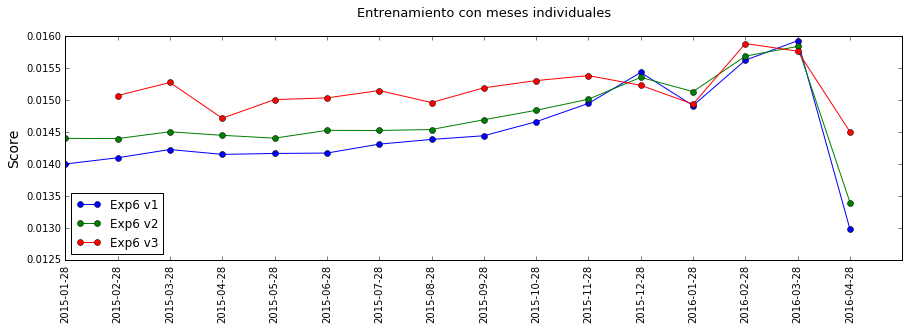

In [70]:
plt.figure(figsize=(15, 4))
plt.plot(score_exp6_1, '-o', score_exp6_2, '-o', score_exp6_3nan, '-o')
plt.xticks(range(len(dates)), dates, rotation=90)
plt.title('Entrenamiento con meses individuales\n', size=13)
plt.ylabel('Score', size=14)
plt.legend(['Exp6 v1', 'Exp6 v2', 'Exp6 v3'], loc=0)

In [61]:
scores_exp6 = [score_exp6_1, score_exp6_2, score_exp6_3]
for i, scores in enumerate(scores_exp6):
    max_sc = scores.max()
    ind_max_sc = list(reversed(scores.argsort()))[0]
    ind_max_sc = ind_max_sc + 1 if i == 2 else ind_max_sc
    print("En el exp6 v{} el mayor score es {:.5f} ({}) y equivale al {:.3f}% del score ideal".format(i+1, max_sc,
                                                                                              dates[ind_max_sc],
                                                                                              100*max_sc/max_score_may16[0]))
    

En el exp6 v1 el mayor score es 0.01593 (2016-03-28) y equivale al 55.535% del score ideal
En el exp6 v2 el mayor score es 0.01584 (2016-03-28) y equivale al 55.221% del score ideal
En el exp6 v3 el mayor score es 0.01589 (2016-02-28) y equivale al 55.380% del score ideal


In [41]:
score_exp7_1 = exp7_1['score'].values
score_exp7_2 = exp7_2['score'].values
score_exp7_3 = exp7_3['score'].values

score_exp7_3nan = np.insert(score_exp7_3, 0, np.nan)

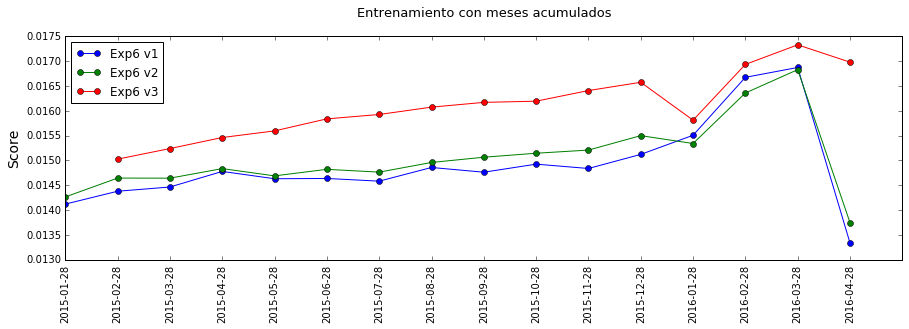

In [262]:
plt.figure(figsize=(15, 4))
plt.plot(score_exp7_1, '-o', score_exp7_2, '-o', score_exp7_3nan, '-o')
plt.xticks(range(len(dates)), dates, rotation=90)
plt.title('Entrenamiento con meses acumulados\n', size=13)
plt.ylabel('Score', size=14)
plt.legend(['Exp6 v1', 'Exp6 v2', 'Exp6 v3'], loc=0)

In [60]:
scores_exp7 = [score_exp7_1, score_exp7_2, score_exp7_3]
for i, scores in enumerate(scores_exp7):
    max_sc = scores.max()
    ind_max_sc = list(reversed(scores.argsort()))[0]
    ind_max_sc = ind_max_sc + 1 if i == 2 else ind_max_sc
        
    print("En el exp6 v{} el mayor score es {:.5f} ({}) y equivale al {:.3f}% del score ideal".format(i+1, max_sc,
                                                                                              dates[ind_max_sc],
                                                                                              100*max_sc/max_score_may16[0]))

En el exp6 v1 el mayor score es 0.01687 (2016-03-28) y equivale al 58.815% del score ideal
En el exp6 v2 el mayor score es 0.01683 (2016-03-28) y equivale al 58.661% del score ideal
En el exp6 v3 el mayor score es 0.01733 (2016-03-28) y equivale al 60.405% del score ideal


---

In [17]:
df_purchasers = pd.read_csv('data/clean/train_purchasers.csv', index_col='index')

In [55]:
df_copy = df.copy()

In [39]:
df_copy_purchasers = df_purchasers.copy()

In [40]:
df_copy_test = df_test.copy()

### Revisión de cambios (deltas) en las *features* del dataframe de compradores

In [43]:
cols = df_purchasers.select_dtypes(['float64']).columns

for col in cols:
    #feature = 'tiprel_1mes'
    df_aux = df_purchasers.groupby(['ncodpers']).agg({col: {'min': 'min',
                                                             'max': 'max',
                                                             'mean': 'mean',
                                                             'median': 'median'
                                                             }})
    df_aux2 = df_aux.loc[df_aux.loc[:, (col, 'mean')] > df_aux.loc[:, (col, 'median')]]
    print("{:22} {:10} representa el {:10.3f}% de todos los clientes del dataset".format(col, df_aux2.shape[0],
                                                                  df_aux2.shape[0]*100/df_aux.shape[0]))

fecha_dato_year             37553 representa el     20.292% de todos los clientes del dataset
fecha_dato_month            38055 representa el     20.563% de todos los clientes del dataset
fecha_dato_day                  0 representa el      0.000% de todos los clientes del dataset
ncodpers                        0 representa el      0.000% de todos los clientes del dataset
ind_empleado                    0 representa el      0.000% de todos los clientes del dataset
pais_residencia                 0 representa el      0.000% de todos los clientes del dataset
sexo                            0 representa el      0.000% de todos los clientes del dataset
age                         21725 representa el     11.739% de todos los clientes del dataset
fecha_alta_year                 0 representa el      0.000% de todos los clientes del dataset
fecha_alta_month                0 representa el      0.000% de todos los clientes del dataset
fecha_alta_day                  0 representa el      0.000% 

#### Adición de las columnas *deltas* en el dataset de compradores

In [56]:
delta_cols = ['antiguedad', 'renta', 'segmento']
for col in delta_cols:
    #feature = 'tiprel_1mes'
    df_aux = df.groupby(['ncodpers']).agg({col: {'min': 'min',
                                                             'max': 'max',
                                                             'mean': 'mean',
                                                             'median': 'median'
                                                             }})
    
    df_aux[col+'_delta'] = df_aux.loc[:, [(col, 'mean')]] / df_aux.loc[:, [(col, 'median')]].as_matrix()
    df_aux.reset_index(inplace=True)
    df_aux.columns = df_aux.columns.droplevel(1)
    df_copy = df_copy.merge(df_aux.loc[:, ['ncodpers', col+'_delta']], on='ncodpers')
    print(col)

df_copy.replace(np.nan, 0, inplace=True)

antiguedad
renta
segmento


#### Experimento
Se entrenará con los features añadidos y test será Junio 2016

In [57]:
df_copy.head()

,fecha_dato,fecha_dato_year,fecha_dato_month,fecha_dato_day,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,...,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,antiguedad_delta,renta_delta,segmento_delta
0,2015-01-28,2015,1,28,1375586,1,1,1,35,2015-01-12,...,1,1.0,29.0,7,1.0,87218.1,1,1.154412,1.0,1.0
1,2015-02-28,2015,2,28,1375586,1,1,1,35,2015-01-12,...,1,1.0,29.0,7,1.0,87218.1,1,1.154412,1.0,1.0
2,2015-03-28,2015,3,28,1375586,1,1,1,35,2015-01-12,...,1,1.0,29.0,7,1.0,87218.1,1,1.154412,1.0,1.0
3,2015-04-28,2015,4,28,1375586,1,1,1,35,2015-01-12,...,1,1.0,29.0,7,1.0,87218.1,1,1.154412,1.0,1.0
4,2015-05-28,2015,5,28,1375586,1,1,1,35,2015-01-12,...,1,1.0,29.0,7,1.0,87218.1,1,1.154412,1.0,1.0


In [58]:
x_train = df_copy
y_train = df_targets.loc[x_train.index]

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
%%time
x = x_train.drop(['fecha_dato', 'ncodpers', 'fecha_alta'], axis=1).as_matrix()
y = y_train.as_matrix()
model = local.model(x, y, DecisionTreeClassifier())

CPU times: user 13min 5s, sys: 16.4 s, total: 13min 21s
Wall time: 13min 21s


#### Procesamiento de datos test

In [60]:
x_test = x_train.loc[:, :'segmento'].append(df_test)

x_test.reset_index(drop=True, inplace=True)

delta_cols = ['antiguedad', 'renta', 'segmento']
for col in delta_cols:
    #feature = 'tiprel_1mes'
    df_aux = x_test.groupby(['ncodpers']).agg({col: {'min': 'min',
                                                             'max': 'max',
                                                             'mean': 'mean',
                                                             'median': 'median'
                                                             }})
    
    df_aux[col+'_delta'] = df_aux.loc[:, [(col, 'mean')]] / df_aux.loc[:, [(col, 'median')]].as_matrix()
    df_aux.reset_index(inplace=True)
    df_aux.columns = df_aux.columns.droplevel(1)
    x_test = x_test.merge(df_aux.loc[:, ['ncodpers', col+'_delta']], on='ncodpers')
    print(col)

x_test.replace(np.nan, 0, inplace=True)

x_test = x_test.loc[x_test['fecha_dato'] == '2016-06-28']

x_test.reset_index(drop=True, inplace=True)

xtest = x_test.drop(['fecha_dato', 'ncodpers', 'fecha_alta'], axis=1).as_matrix()

antiguedad
renta
segmento


In [61]:
%%time
probs,preds = local.calculatePredsProbs(xtest, model)

CPU times: user 6.12 s, sys: 424 ms, total: 6.54 s
Wall time: 6.53 s


In [62]:
%%time
x_test.loc[:, 'ncodpers'] = x_test['ncodpers'].astype('int64')
x_prev = df.loc[df['fecha_dato'] == '2016-05-28']
y_prev = df_targets.loc[x_prev.index]
subm = local.processPredictions(probs, preds, x_prev, x_test, y_prev, env='submit')

results/submissions/2018-07-27-h21-40-39_submission.csv
CPU times: user 21.8 s, sys: 1.22 s, total: 23 s
Wall time: 24.1 s


In [63]:
!bash results/submissions/kaggle_submission "DT, dataset con deltas, ORIGINAL"

2018-07-27-h21-40-39_submission.csv
/home/sergioml/.local/lib/python2.7/site-packages/urllib3/contrib/socks.py:37: DependencyWarning: SOCKS support in urllib3 requires the installation of optional dependencies: specifically, PySocks.  For more information, see https://urllib3.readthedocs.io/en/latest/contrib.html#socks-proxies
  DependencyWarning
Successfully submitted to Santander Product Recommendation
real	0m17.851s
user	0m1.464s
sys	0m0.352s


#### Experimento II
Se entrenará sólo con el mes de Mayo 2016 y los features añadidos

In [26]:
x_train = df_copy_purchasers.loc[df_copy_purchasers['fecha_dato'] == '2016-05-28']
y_train = df_purch_targets.loc[x_train.index, 'ind_ahor_fin_ult1':]

In [28]:
%%time
x = x_train.drop(['fecha_dato', 'ncodpers', 'fecha_alta'], axis=1).as_matrix()
y = y_train.as_matrix()
model = local.model(x, y, RandomForestClassifier(n_jobs=4))

CPU times: user 5.84 s, sys: 388 ms, total: 6.22 s
Wall time: 2.08 s


In [29]:
x_test = df_copy_purchasers.loc[:, :'segmento'].append(df_test)

x_test.reset_index(drop=True, inplace=True)

delta_cols = ['antiguedad', 'renta', 'segmento']
for col in delta_cols:
    #feature = 'tiprel_1mes'
    df_aux = x_test.groupby(['ncodpers']).agg({col: {'min': 'min',
                                                             'max': 'max',
                                                             'mean': 'mean',
                                                             'median': 'median'
                                                             }})
    
    df_aux[col+'_delta'] = df_aux.loc[:, [(col, 'mean')]] / df_aux.loc[:, [(col, 'median')]].as_matrix()
    df_aux.reset_index(inplace=True)
    df_aux.columns = df_aux.columns.droplevel(1)
    x_test = x_test.merge(df_aux.loc[:, ['ncodpers', col+'_delta']], on='ncodpers')
    print(col)

x_test.replace(np.nan, 0, inplace=True)

x_test = x_test.loc[x_test['fecha_dato'] == '2016-06-28']

x_test.reset_index(drop=True, inplace=True)

xtest = x_test.drop(['fecha_dato', 'ncodpers', 'fecha_alta'], axis=1).as_matrix()

antiguedad
renta
segmento


In [30]:
%%time
probs,preds = local.calculatePredsProbs(xtest, model)

CPU times: user 2min 48s, sys: 6.98 s, total: 2min 54s
Wall time: 1min 21s


In [18]:
%%time
x_test.loc[:, 'ncodpers'] = x_test['ncodpers'].astype('int64')
x_prev = x_train.loc[x_train['fecha_dato'] == '2016-05-28']
subm = local.processPredictions(probs, preds, x_prev, x_test, y_train, env='submit')

results/submissions/2018-07-20-h02-28-20_submission.csv
CPU times: user 17.4 s, sys: 524 ms, total: 17.9 s
Wall time: 19 s


In [19]:
!bash results/submissions/kaggle_submission "RF, sólo mayo 2016 de purchasers con tres deltas de más, se valida con mayo 2016"

2018-07-20-h02-28-20_submission.csv
/home/sergioml/.local/lib/python2.7/site-packages/urllib3/contrib/socks.py:37: DependencyWarning: SOCKS support in urllib3 requires the installation of optional dependencies: specifically, PySocks.  For more information, see https://urllib3.readthedocs.io/en/latest/contrib.html#socks-proxies
  DependencyWarning
Successfully submitted to Santander Product Recommendation
real	2m57.891s
user	0m1.696s
sys	0m0.576s


---
Validando los productos comprados con Mayo 2016 del dataset original

In [32]:
%%time
x_test.loc[:, 'ncodpers'] = x_test['ncodpers'].astype('int64')
x_prev = df.loc[df['fecha_dato'] == '2016-05-28']
subm = local.processPredictions(probs, preds, x_prev, x_test, df_targets, env='submit')

results/submissions/2018-07-20-h02-41-07_submission.csv
CPU times: user 22 s, sys: 1.53 s, total: 23.6 s
Wall time: 24.8 s


In [ ]:
!bash results/submissions/kaggle_submission "RF, sólo mayo 2016 de purchasers con tres deltas de más, se valida con mayo 2016 del dataset original"

2018-07-20-h02-41-07_submission.csv
/home/sergioml/.local/lib/python2.7/site-packages/urllib3/contrib/socks.py:37: DependencyWarning: SOCKS support in urllib3 requires the installation of optional dependencies: specifically, PySocks.  For more information, see https://urllib3.readthedocs.io/en/latest/contrib.html#socks-proxies
  DependencyWarning
Successfully submitted to Santander Product Recommendation
real	1m40.864s
user	0m1.480s
sys	0m0.468s


### Cambios en las *features* del dataframe completo

In [18]:
cols = df.select_dtypes(['int64', 'float64']).columns

for col in cols:
    df_aux = df.groupby(['ncodpers']).agg({col: {'min': 'min',
                                                 'max': 'max',
                                                 'mean': 'mean',
                                                 'median': 'median'}})
    df_aux2 = df_aux.loc[df_aux.loc[:, (col, 'mean')] > df_aux.loc[:, (col, 'median')]]
    print("{:22} {:10} representa el {:10.3f}% de todos los clientes del dataset".format(col, df_aux2.shape[0],
                                                                  df_aux2.shape[0]*100/df_aux.shape[0]))

fecha_dato_year            800308 representa el     85.702% de todos los clientes del dataset
fecha_dato_month           703242 representa el     75.308% de todos los clientes del dataset
fecha_dato_day                  0 representa el      0.000% de todos los clientes del dataset
ncodpers                        0 representa el      0.000% de todos los clientes del dataset
ind_empleado                    0 representa el      0.000% de todos los clientes del dataset
pais_residencia                 0 representa el      0.000% de todos los clientes del dataset
sexo                            0 representa el      0.000% de todos los clientes del dataset
age                        510178 representa el     54.633% de todos los clientes del dataset
fecha_alta_year                 3 representa el      0.000% de todos los clientes del dataset
fecha_alta_month                3 representa el      0.000% de todos los clientes del dataset
fecha_alta_day                  4 representa el      0.000% 

#### Adición de columnas delta

In [5]:
df_copy = df.copy()

delta_cols = ['antiguedad', 'renta', 'segmento']
for col in delta_cols:
    #feature = 'tiprel_1mes'
    df_aux = df_copy.groupby(['ncodpers']).agg({col: {'min': 'min',
                                                             'max': 'max',
                                                             'mean': 'mean',
                                                             'median': 'median'
                                                             }})
    
    df_aux[col+'_delta'] = df_aux.loc[:, [(col, 'mean')]] / df_aux.loc[:, [(col, 'median')]].as_matrix()
    df_aux.reset_index(inplace=True)
    df_aux.columns = df_aux.columns.droplevel(1)
    df_copy = df_copy.merge(df_aux.loc[:, ['ncodpers', col+'_delta']], on='ncodpers')
    print(col)

df_copy.replace(np.nan, 0, inplace=True)

In [12]:
deltas = [col+'_delta' for col in delta_cols]

In [13]:
df_copy.loc[:, deltas] = df_copy.loc[:, deltas].astype('float32')

#### Experimento
Entrenamiento con todos los datos del dataset original y los deltas añadidos y con test de Junio 2016

In [7]:
x_train = df_copy
y_train = df_targets

x = x_train.drop(['fecha_dato', 'ncodpers', 'fecha_alta'], axis=1).as_matrix()
y = y_train.as_matrix()

In [9]:
%%time
model = local.model(x, y, RandomForestClassifier(n_jobs=4))

CPU times: user 47min 19s, sys: 3min 17s, total: 50min 37s
Wall time: 15min 42s


In [11]:
%%time
x_test = x_train.loc[:, :'segmento'].append(df_test)
x_test.reset_index(drop=True, inplace=True)

delta_cols = ['antiguedad', 'renta', 'segmento']
for col in delta_cols:
    #feature = 'tiprel_1mes'
    df_aux = x_test.groupby(['ncodpers']).agg({col: {'min': 'min',
                                                             'max': 'max',
                                                             'mean': 'mean',
                                                             'median': 'median'
                                                             }})
    
    df_aux[col+'_delta'] = df_aux.loc[:, [(col, 'mean')]] / df_aux.loc[:, [(col, 'median')]].as_matrix()
    df_aux.reset_index(inplace=True)
    df_aux.columns = df_aux.columns.droplevel(1)
    x_test = x_test.merge(df_aux.loc[:, ['ncodpers', col+'_delta']], on='ncodpers')
    print(col)

x_test.replace(np.nan, 0, inplace=True)
x_test = x_test.loc[x_test['fecha_dato'] == '2016-06-28']
x_test.reset_index(drop=True, inplace=True)
x_test.loc[:, 'ncodpers'] = x_test['ncodpers'].astype('int64')
xtest = x_test.drop(['fecha_dato', 'ncodpers', 'fecha_alta'], axis=1).as_matrix()

probs,preds = local.calculatePredsProbs(xtest, model)

antiguedad
renta
segmento
CPU times: user 3min 30s, sys: 36.3 s, total: 4min 6s
Wall time: 2min 57s


In [12]:
%%time
x_prev = x_train.loc[x_train['fecha_dato'] == '2016-05-28']
subm = local.processPredictions(probs, preds, x_prev, x_test, y_train, env='submit')

results/submissions/2018-07-20-h02-14-15_submission.csv
CPU times: user 22.7 s, sys: 940 ms, total: 23.6 s
Wall time: 24.8 s


In [13]:
!bash results/submissions/kaggle_submission "RF, dataset original con features deltas"

2018-07-20-h02-14-15_submission.csv
/home/sergioml/.local/lib/python2.7/site-packages/urllib3/contrib/socks.py:37: DependencyWarning: SOCKS support in urllib3 requires the installation of optional dependencies: specifically, PySocks.  For more information, see https://urllib3.readthedocs.io/en/latest/contrib.html#socks-proxies
  DependencyWarning
Successfully submitted to Santander Product Recommendation
real	0m32.856s
user	0m1.352s
sys	0m0.544s


#### Experimento II
Entrenamiento sólo con Mayo 2016 y con features de más

In [21]:
delta_cols = ['antiguedad', 'renta', 'segmento']
for col in delta_cols:
    #feature = 'tiprel_1mes'
    df_aux = df_copy.groupby(['ncodpers']).agg({col: {'min': 'min',
                                                             'max': 'max',
                                                             'mean': 'mean',
                                                             'median': 'median'
                                                             }})
    
    df_aux[col+'_delta'] = df_aux.loc[:, [(col, 'mean')]] / df_aux.loc[:, [(col, 'median')]].as_matrix()
    df_aux.reset_index(inplace=True)
    df_aux.columns = df_aux.columns.droplevel(1)
    df_copy = df_copy.merge(df_aux.loc[:, ['ncodpers', col+'_delta']], on='ncodpers')
    print(col)

df_copy.replace(np.nan, 0, inplace=True)

antiguedad
renta
segmento


In [22]:
x_train = df_copy.loc[df_copy['fecha_dato'] == '2016-05-28']
y_train = df_targets.loc[x_train.index]

x = x_train.drop(['fecha_dato', 'ncodpers', 'fecha_alta'], axis=1).as_matrix()
y = y_train.as_matrix()

In [23]:
%%time
model = local.model(x, y, RandomForestClassifier(n_jobs=4))

CPU times: user 4min 5s, sys: 18.8 s, total: 4min 23s
Wall time: 1min 19s


In [11]:
%%time
x_test = x_train.loc[:, :'segmento'].append(df_test)
x_test.reset_index(drop=True, inplace=True)

delta_cols = ['antiguedad', 'renta', 'segmento']
for col in delta_cols:
    #feature = 'tiprel_1mes'
    df_aux = x_test.groupby(['ncodpers']).agg({col: {'min': 'min',
                                                             'max': 'max',
                                                             'mean': 'mean',
                                                             'median': 'median'
                                                             }})
    
    df_aux[col+'_delta'] = df_aux.loc[:, [(col, 'mean')]] / df_aux.loc[:, [(col, 'median')]].as_matrix()
    df_aux.reset_index(inplace=True)
    df_aux.columns = df_aux.columns.droplevel(1)
    x_test = x_test.merge(df_aux.loc[:, ['ncodpers', col+'_delta']], on='ncodpers')
    print(col)

x_test.replace(np.nan, 0, inplace=True)
x_test = x_test.loc[x_test['fecha_dato'] == '2016-06-28']
x_test.reset_index(drop=True, inplace=True)
x_test.loc[:, 'ncodpers'] = x_test['ncodpers'].astype('int64')
xtest = x_test.drop(['fecha_dato', 'ncodpers', 'fecha_alta'], axis=1).as_matrix()

probs,preds = local.calculatePredsProbs(xtest, model)

antiguedad
renta
segmento
CPU times: user 3min 30s, sys: 36.3 s, total: 4min 6s
Wall time: 2min 57s


In [24]:
%%time
x_prev = x_train.loc[x_train['fecha_dato'] == '2016-05-28']
subm = local.processPredictions(probs, preds, x_prev, x_test, y_train, env='submit')

results/submissions/2018-07-20-h02-36-11_submission.csv
CPU times: user 19.7 s, sys: 1.52 s, total: 21.3 s
Wall time: 22.4 s


In [25]:
!bash results/submissions/kaggle_submission "RF, dataset original con features de más, entrenamiento sólo con Mayo2016"

2018-07-20-h02-36-11_submission.csv
/home/sergioml/.local/lib/python2.7/site-packages/urllib3/contrib/socks.py:37: DependencyWarning: SOCKS support in urllib3 requires the installation of optional dependencies: specifically, PySocks.  For more information, see https://urllib3.readthedocs.io/en/latest/contrib.html#socks-proxies
  DependencyWarning
Successfully submitted to Santander Product Recommendation
real	1m57.257s
user	0m1.532s
sys	0m0.480s
